In [ ]:
%pip install missingno

In [ ]:
%pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 48.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=b336a46512e453e9b7ac7ebfce405568e705a60733cd61b50f3303f2d98a286c
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
   

In [ ]:
import missingno as msno
from ydata_profiling import ProfileReport

In [ ]:
from sklearn.preprocessing import LabelEncoder # convierte el texto a numeros
from sklearn.svm import SVC #maquina soporte vectorial
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from joblib import dump, load

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/datasets_pandas_scikit_learn_spark-master/lung cancer patient data sets.csv', sep=',', header=0)
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
df.dtypes

Age                         object
Gender                      object
Air Pollution               object
Alcohol use                 object
Dust Allergy                object
OccuPational Hazards        object
Genetic Risk                object
chronic Lung Disease        object
Balanced Diet               object
Obesity                      int64
Smoking                     object
Passive Smoker              object
Chest Pain                  object
Coughing of Blood           object
Fatigue                      int64
Weight Loss                 object
Shortness of Breath         object
Wheezing                    object
Swallowing Difficulty       object
Clubbing of Finger Nails    object
Frequent Cold               object
Dry Cough                   object
Snoring                      int64
Level                       object
dtype: object

In [ ]:
for columna in df.columns:
    print(columna)
    dfp = pd.to_numeric(df[columna], errors="coerce")
    ix_pos = dfp.isna()
    print(df[ix_pos])
    print()

Age
    Age Gender Air Pollution Alcohol use Dust Allergy OccuPational Hazards  \
261   .      .             1           2            4                    5   

    Genetic Risk chronic Lung Disease Balanced Diet  Obesity  ... Fatigue  \
261            6                    5             5        4  ...       3   

    Weight Loss Shortness of Breath Wheezing  Swallowing Difficulty  \
261           8                   7        3                      8   

    Clubbing of Finger Nails Frequent Cold Dry Cough Snoring Level  
261                        3             2         3       1   Low  

[1 rows x 24 columns]

Gender
    Age Gender Air Pollution Alcohol use Dust Allergy OccuPational Hazards  \
130  14      .             2           4            5                    6   
261   .      .             1           2            4                    5   

    Genetic Risk chronic Lung Disease Balanced Diet  Obesity  ... Fatigue  \
130            5                    5             4        6

In [ ]:
hp = {"Age": {".":None}}
df = df.replace(hp)
df["Age"] = pd.to_numeric(df["Age"])

hp = {"Gender": {" .":None,".":None}}
df = df.replace(hp)
df["Gender"] = pd.to_numeric(df["Gender"])

hp = {"Air Pollution": {". ":None,".":None," ":None,"*":None,"6D287":None,"6C594":None}}
df = df.replace(hp)
df["Air Pollution"] = pd.to_numeric(df["Air Pollution"])

hp = {"Alcohol use": {" ":None,"*":None}}
df = df.replace(hp)
df["Alcohol use"] = pd.to_numeric(df["Alcohol use"])

hp = {"Dust Allergy": {". ":None,".":None}}
df = df.replace(hp)
df["Dust Allergy"] = pd.to_numeric(df["Dust Allergy"])

hp = {"OccuPational Hazards": {". ":None,".":None,"NaN":None}}
df = df.replace(hp)
df["OccuPational Hazards"] = pd.to_numeric(df["OccuPational Hazards"])

hp = {"Genetic Risk": {". ":None,".":None," ":None}}
df = df.replace(hp)
df["Genetic Risk"] = pd.to_numeric(df["Genetic Risk"])

hp = {"chronic Lung Disease": {"  ":None," ":None}}
df = df.replace(hp)
df["chronic Lung Disease"] = pd.to_numeric(df["chronic Lung Disease"])

hp = {"Balanced Diet": {". ":None,".":None,"*":None,"7I387":None}}
df = df.replace(hp)
df["Balanced Diet"] = pd.to_numeric(df["Balanced Diet"])

hp = {"Smoking": {". ":None,".":None," ":None}}
df = df.replace(hp)
df["Smoking"] = pd.to_numeric(df["Smoking"])

hp = {"Passive Smoker": {". ":None,".":None,"*":None," ":None}}
df = df.replace(hp)
df["Passive Smoker"] = pd.to_numeric(df["Passive Smoker"])

hp = {"Chest Pain": {". ":None,".":None,"*":None," ":None}}
df = df.replace(hp)
df["Chest Pain"] = pd.to_numeric(df["Chest Pain"])

hp = {"Coughing of Blood": {". ":None,".":None,"*":None," ":None}}
df = df.replace(hp)
df["Coughing of Blood"] = pd.to_numeric(df["Coughing of Blood"])

hp = {"Weight Loss": {". ":None,".":None,"*":None," ":None}}
df = df.replace(hp)
df["Weight Loss"] = pd.to_numeric(df["Weight Loss"])

hp = {"Shortness of Breath": {". ":None,".":None,"*":None," ":None}}
df = df.replace(hp)
df["Shortness of Breath"] = pd.to_numeric(df["Shortness of Breath"])

hp = {"Wheezing": {". ":None,".":None,"*":None," ":None,"NaN":None}}
df = df.replace(hp)
df["Wheezing"] = pd.to_numeric(df["Wheezing"])

hp = {"Swallowing Difficulty": {". ":None,".":None,"*":None," ":None}}
df = df.replace(hp)
df["Swallowing Difficulty"] = pd.to_numeric(df["Swallowing Difficulty"])

hp = {"Clubbing of Finger Nails": {". ":None,".":None,"*":None," ":None}}
df = df.replace(hp)
df["Clubbing of Finger Nails"] = pd.to_numeric(df["Clubbing of Finger Nails"])

hp = {"Frequent Cold": {"3U256":None,". ":None,".":None,"*":None," ":None}}
df = df.replace(hp)
df["Frequent Cold"] = pd.to_numeric(df["Frequent Cold"])

hp = {"Dry Cough": {". ":None,".":None,"*":None," ":None}}
df = df.replace(hp)
df["Dry Cough"] = pd.to_numeric(df["Dry Cough"])

In [ ]:
df.dtypes

Age                         float64
Gender                      float64
Air Pollution               float64
Alcohol use                 float64
Dust Allergy                float64
OccuPational Hazards        float64
Genetic Risk                float64
chronic Lung Disease        float64
Balanced Diet               float64
Obesity                       int64
Smoking                     float64
Passive Smoker              float64
Chest Pain                  float64
Coughing of Blood           float64
Fatigue                       int64
Weight Loss                 float64
Shortness of Breath         float64
Wheezing                    float64
Swallowing Difficulty       float64
Clubbing of Finger Nails    float64
Frequent Cold               float64
Dry Cough                   float64
Snoring                       int64
Level                        object
dtype: object

<Axes: >

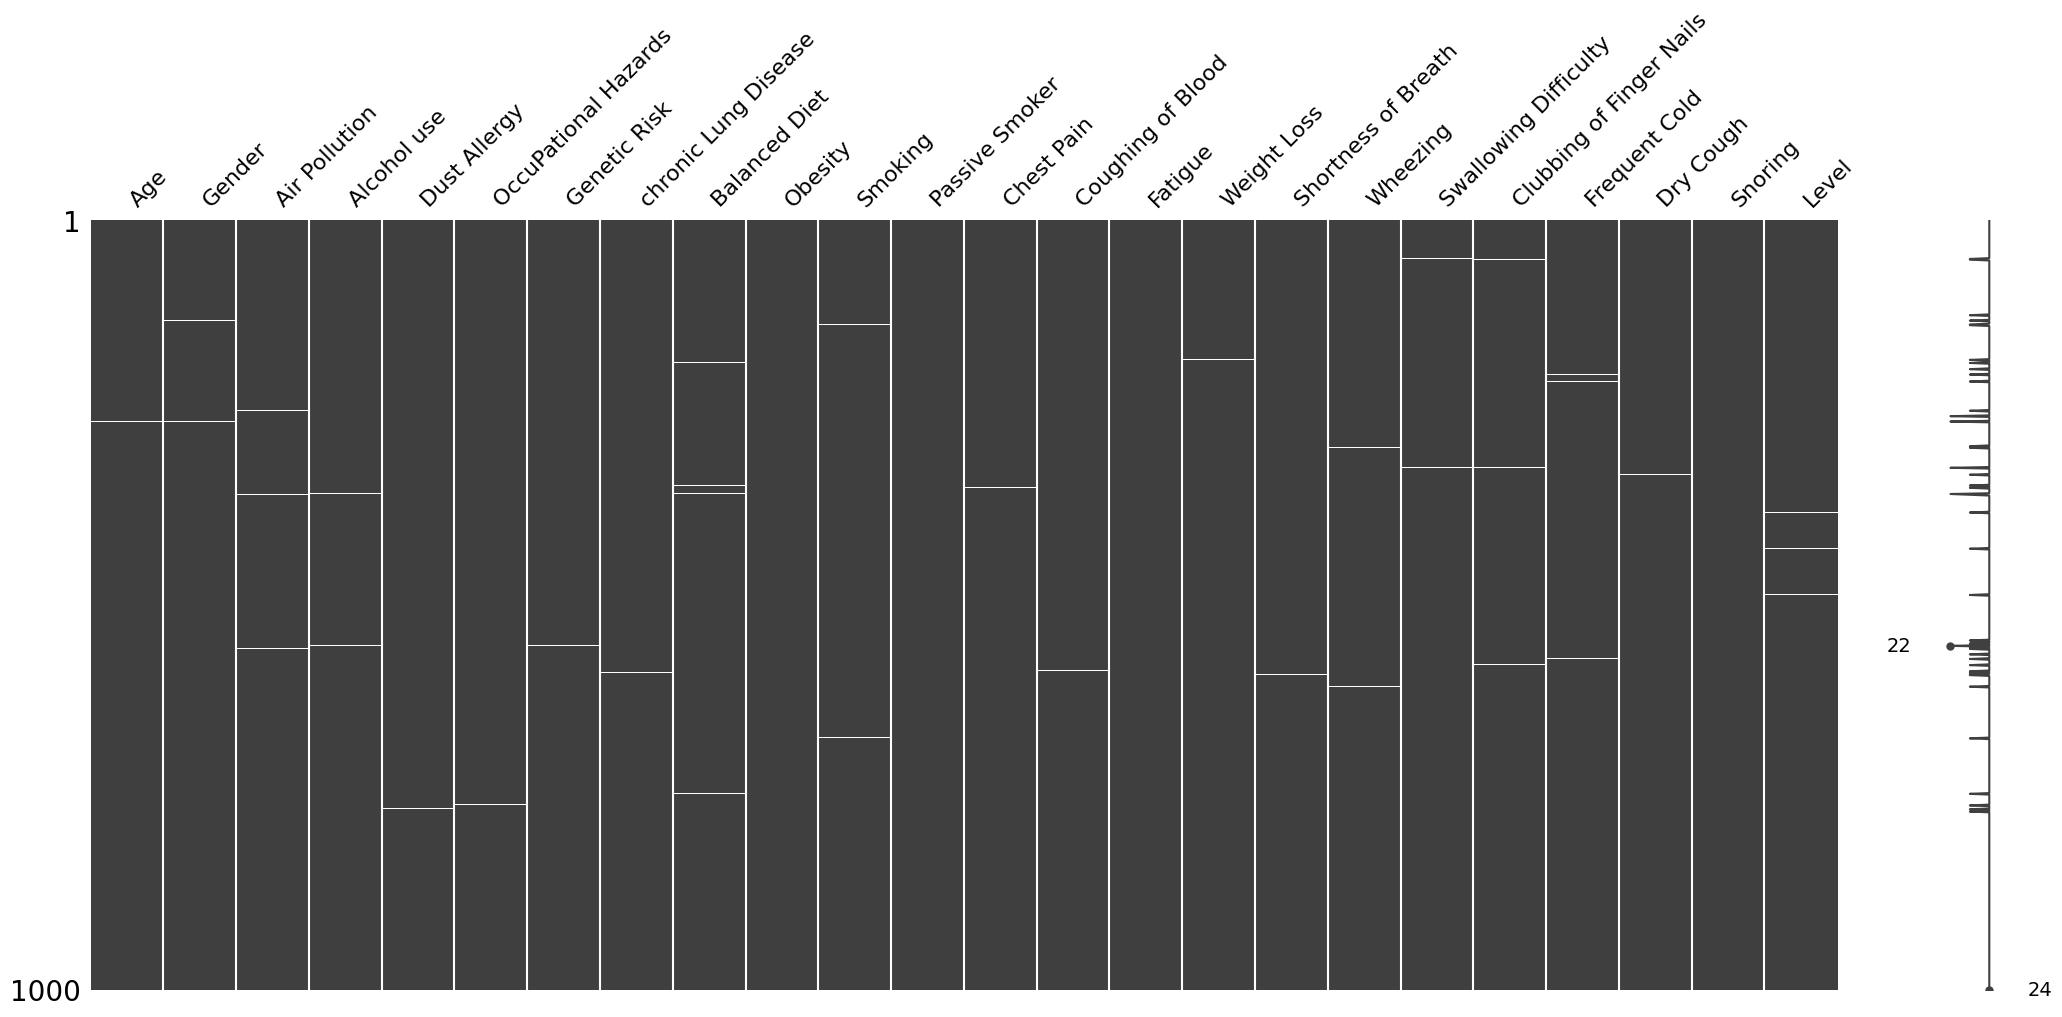

In [ ]:
msno.matrix(df)

<Axes: >

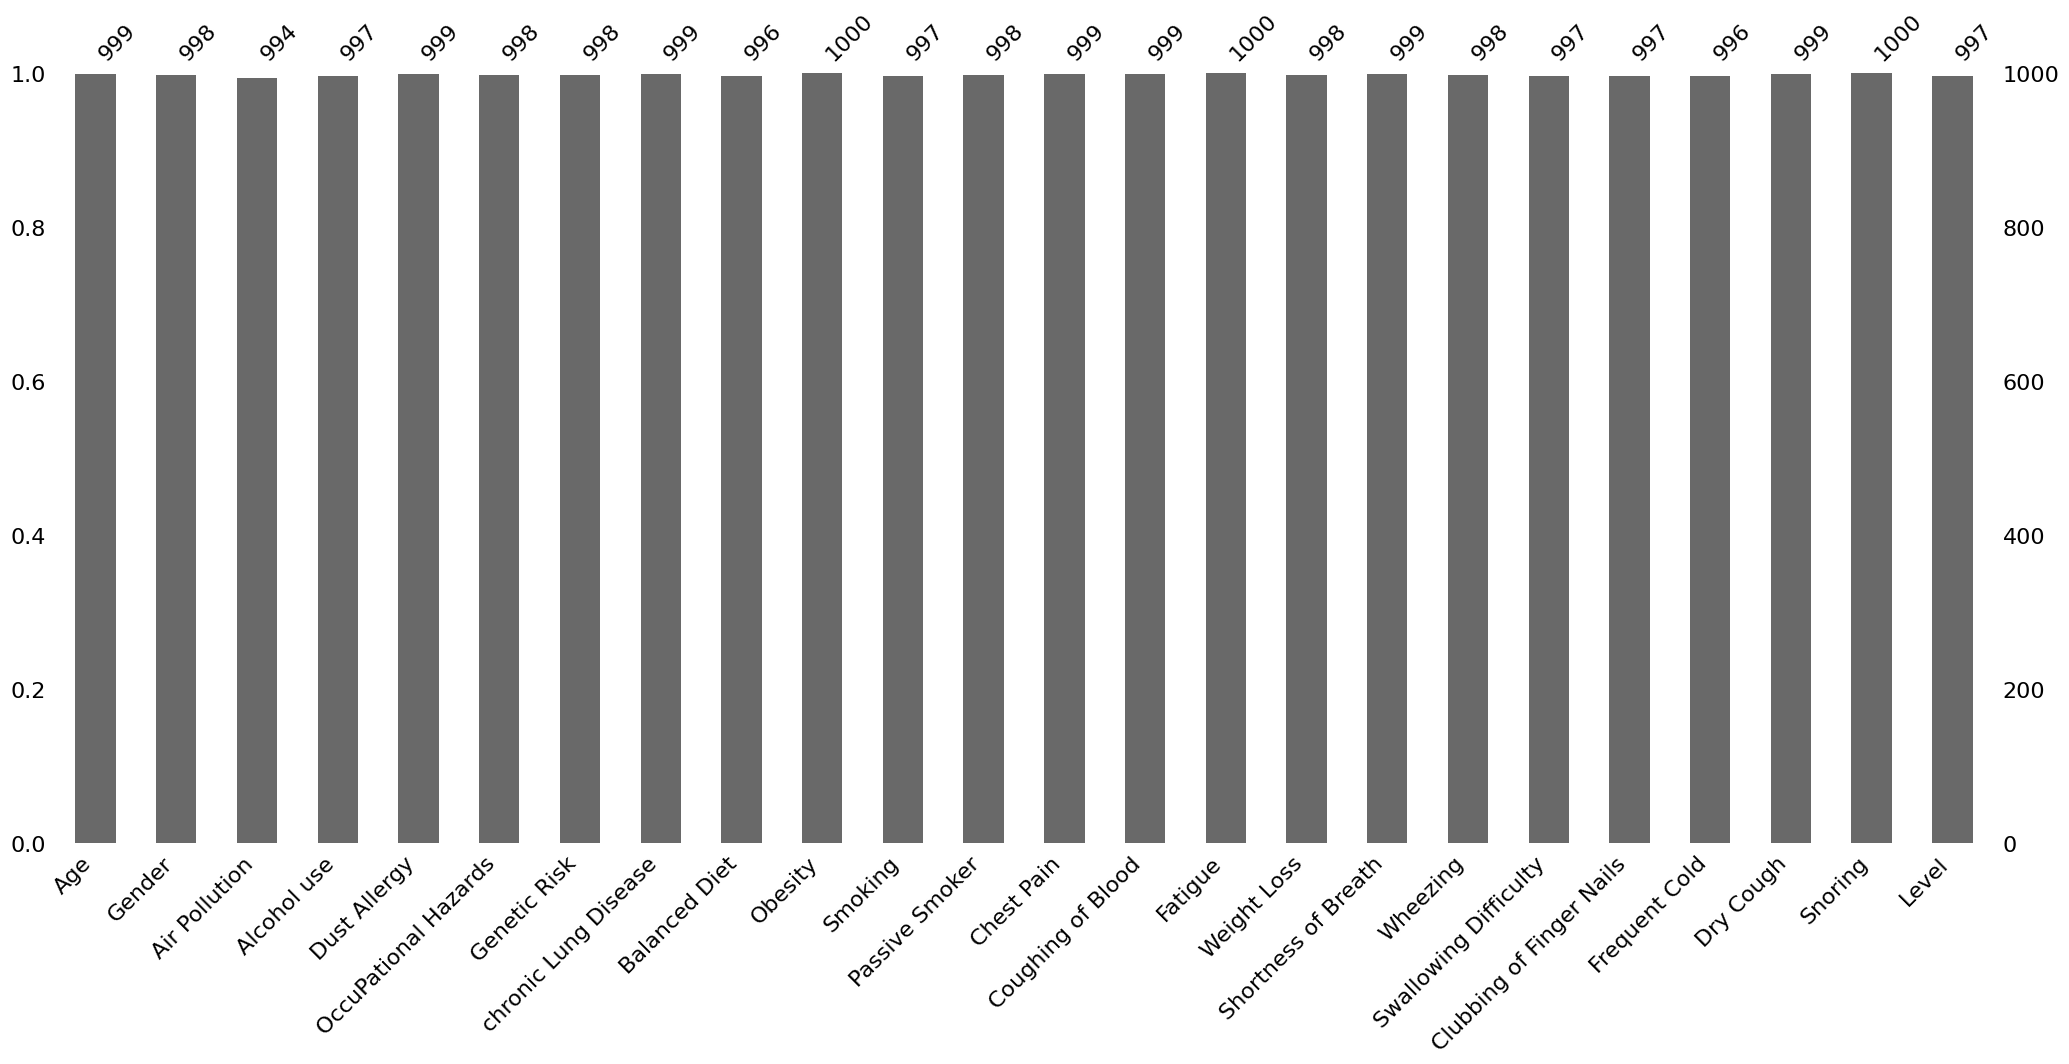

In [ ]:
msno.bar(df)

In [ ]:
profile = ProfileReport(df, title='Profiling Report')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.isnull().sum()

Age                         1
Gender                      2
Air Pollution               6
Alcohol use                 3
Dust Allergy                1
OccuPational Hazards        2
Genetic Risk                2
chronic Lung Disease        1
Balanced Diet               4
Obesity                     0
Smoking                     3
Passive Smoker              2
Chest Pain                  1
Coughing of Blood           1
Fatigue                     0
Weight Loss                 2
Shortness of Breath         1
Wheezing                    2
Swallowing Difficulty       3
Clubbing of Finger Nails    3
Frequent Cold               4
Dry Cough                   1
Snoring                     0
Level                       3
dtype: int64

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Gender'].fillna(df['Gender'].median(), inplace=True)
df['Air Pollution'].fillna(df['Air Pollution'].median(), inplace=True)
df['Alcohol use'].fillna(df['Alcohol use'].median(), inplace=True)
df['Dust Allergy'].fillna(df['Dust Allergy'].median(), inplace=True)
df['OccuPational Hazards'].fillna(df['OccuPational Hazards'].median(), inplace=True)
df['Genetic Risk'].fillna(df['Genetic Risk'].median(), inplace=True)
df['chronic Lung Disease'].fillna(df['chronic Lung Disease'].median(), inplace=True)
df['Balanced Diet'].fillna(df['Balanced Diet'].median(), inplace=True)
df['Smoking'].fillna(df['Smoking'].median(), inplace=True)
df['Passive Smoker'].fillna(df['Passive Smoker'].median(), inplace=True)
df['Chest Pain'].fillna(df['Chest Pain'].median(), inplace=True)
df['Coughing of Blood'].fillna(df['Coughing of Blood'].median(), inplace=True)
df['Weight Loss'].fillna(df['Weight Loss'].median(), inplace=True)
df['Shortness of Breath'].fillna(df['Shortness of Breath'].median(), inplace=True)
df['Wheezing'].fillna(df['Wheezing'].median(), inplace=True)
df['Swallowing Difficulty'].fillna(df['Swallowing Difficulty'].median(), inplace=True)
df['Clubbing of Finger Nails'].fillna(df['Clubbing of Finger Nails'].median(), inplace=True)
df['Frequent Cold'].fillna(df['Frequent Cold'].median(), inplace=True)
df['Dry Cough'].fillna(df['Dry Cough'].median(), inplace=True)
df['Level'].fillna(df['Level'].mode().iloc[0], inplace=True)

In [ ]:
df.isnull().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [ ]:
le6 = LabelEncoder()
df['nivel'] = le6.fit_transform(df['Level'])
dump(le6, 'le6.joblib')

['le6.joblib']

In [ ]:
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,nivel
0,33.0,1.0,2.0,4.0,5.0,4.0,3.0,2.0,2.0,4,...,4.0,2.0,2.0,3.0,1.0,2.0,3.0,4,Low,1
1,17.0,1.0,3.0,1.0,5.0,3.0,4.0,2.0,2.0,2,...,3.0,7.0,8.0,6.0,2.0,1.0,7.0,2,Medium,2
2,35.0,1.0,4.0,5.0,6.0,5.0,5.0,4.0,6.0,7,...,7.0,9.0,2.0,1.0,4.0,6.0,7.0,2,High,0
3,37.0,1.0,7.0,7.0,7.0,7.0,6.0,7.0,7.0,7,...,2.0,3.0,1.0,4.0,5.0,6.0,7.0,5,High,0
4,46.0,1.0,6.0,8.0,7.0,7.0,7.0,6.0,7.0,7,...,2.0,4.0,1.0,4.0,2.0,4.0,2.0,3,High,0


<ipython-input-62-fdf8fa3ad365>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


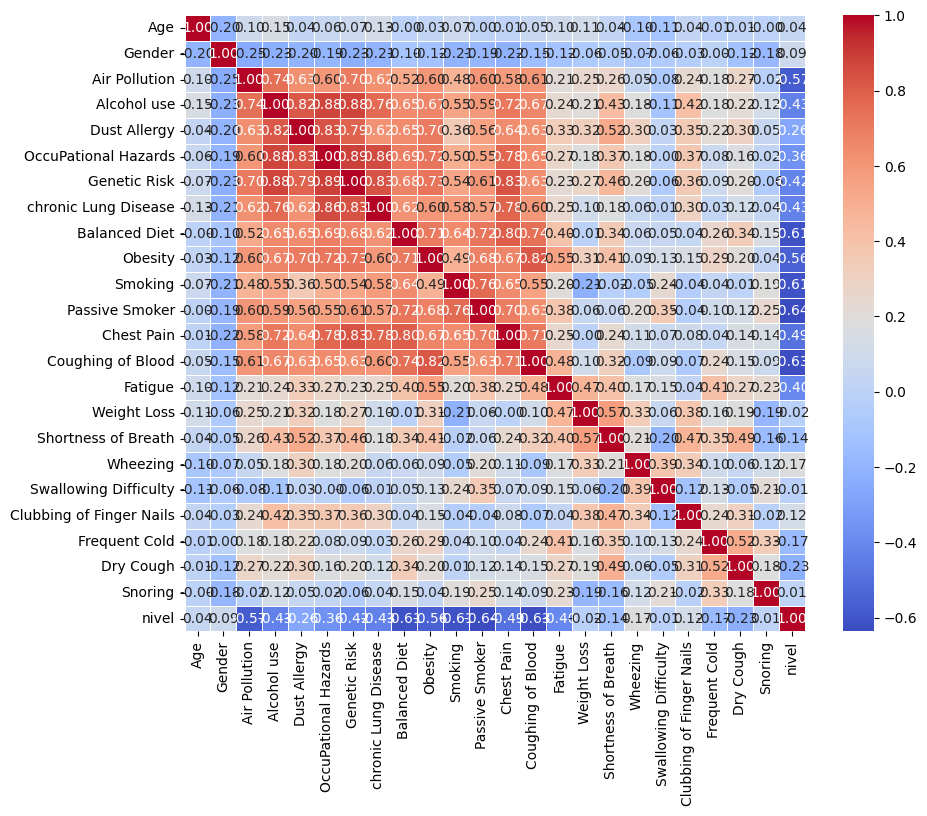

In [ ]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=ax)
plt.show()

In [ ]:
umbral = 0.4
high_corr_features = (corr_matrix.abs() > umbral).sum()
high_corr_features = high_corr_features[high_corr_features > 1].index.tolist()

# Relevancia de las variables
# Eliminar aquellas que no tienen impacto significativo en la variable objetivo.
print(high_corr_features)

Características con mayor correlación:
['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'nivel']


In [ ]:
# solo tomamos 18 variables de las 24 que hay
features = ['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough']
label = 'Level' # nivel

In [ ]:
df[label].value_counts()

High      367
Medium    332
Low       301
Name: Level, dtype: int64

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(df[features], df.nivel, test_size=0.20, random_state=0, stratify=df.nivel)

class_weights = len(ytrain) / (len(np.unique(ytrain)) * np.bincount(ytrain))
sample_weights = class_weights[ytrain]

In [ ]:
print(xtrain.shape)
print(xtest.shape)
print(len(ytrain))
print(len(ytest))

(800, 18)
(200, 18)
800
200


In [ ]:
ytrain.value_counts()

0    293
2    266
1    241
Name: nivel, dtype: int64

# SVC Maquina de soporte vectorial

In [ ]:
svm = SVC(probability=True, class_weight='balanced')
modelo = svm.fit(xtrain, ytrain) # sample_weight=sample_weights
prediccion = modelo.predict(xtest)

In [ ]:
prediccion
# ytest = prediccion
prediccion_list = prediccion.tolist()
ytest_lista = ytest.tolist()
i = 0
for p in prediccion_list:
  print(p, ytest_lista[i])
  i += 1

High      367
Medium    332
Low       301
Name: Level, dtype: int64

score:  0.995
recall_score:  0.995
accuracy_score:  0.995
f1_score:  0.995

classification_report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        73
           1       1.00      0.98      0.99        61
           2       1.00      1.00      1.00        66

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



<Axes: >

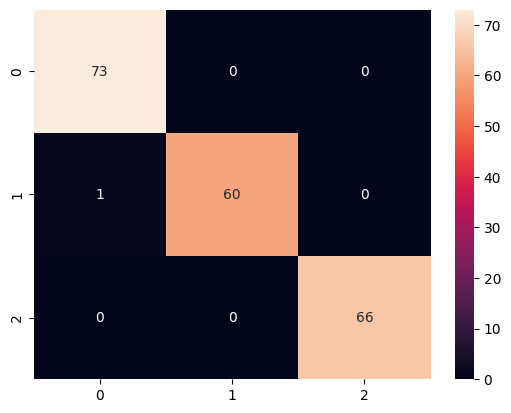

In [ ]:
print(df[label].value_counts())
print()
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ',recall_score(prediccion,ytest, average='micro'))
print('accuracy_score: ',accuracy_score(prediccion,ytest))
print('f1_score: ',f1_score(prediccion,ytest, average='micro'))
print()
print('classification_report: ',classification_report(prediccion,ytest), sep='\n')
# si esta desbalancead recall
cf = confusion_matrix(prediccion,ytest)
sns.heatmap(cf, annot=True)

In [ ]:
# data = {'Age At Procurement':70.5,	'Mutation Count':201.2,	'ms':8,	'pg':0, 'pts':2, 'st':1, 'ss':9, 'tss':0}

p = pd.DataFrame(data, index=[0])
npm = modelo.predict(p)
le6.inverse_transform(npm.tolist())
# datadrif si alucina

array(['sun-exposed'], dtype=object)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(n_estimators=100, class_weight='balanced')
modelo.fit(xtrain, ytrain) #sample_weight=sample_weights
prediccion = modelo.predict(xtest)

High      367
Medium    332
Low       301
Name: Level, dtype: int64

score:  0.995
recall_score:  0.995
accuracy_score:  0.995
f1_score:  0.995

classification_report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        73
           1       1.00      0.98      0.99        61
           2       1.00      1.00      1.00        66

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



<Axes: >

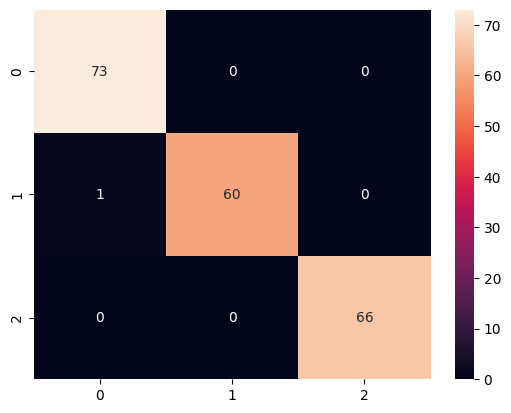

In [ ]:
print(df[label].value_counts())
print()
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ',recall_score(prediccion,ytest, average='micro'))
print('accuracy_score: ',accuracy_score(prediccion,ytest))
print('f1_score: ',f1_score(prediccion,ytest, average='micro'))
print()
print('classification_report: ',classification_report(prediccion,ytest), sep='\n')
# si esta desbalancead recall
cf = confusion_matrix(prediccion,ytest)
sns.heatmap(cf, annot=True)

# Arboles de decicion

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from IPython.display import Image
import pydotplus

In [ ]:
dtc = DecisionTreeClassifier(max_depth=6, class_weight='balanced')
modelo = dtc.fit(xtrain, ytrain) # sample_weight=sample_weights
prediccion = modelo.predict(xtest)

In [ ]:
# ytest = prediccion
prediccion_list = prediccion.tolist()
ytest_lista = ytest.tolist()
i = 0
for p in prediccion_list:
  print(p, ytest_lista[i])
  i += 1

High      367
Medium    332
Low       301
Name: Level, dtype: int64

score:  0.995
recall_score:  0.995
accuracy_score:  0.995
f1_score:  0.995
classification_report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        73
           1       1.00      0.98      0.99        61
           2       1.00      1.00      1.00        66

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



<Axes: >

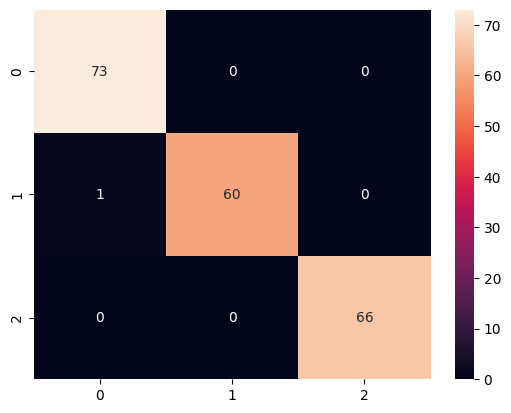

In [ ]:
print(df[label].value_counts())
print()
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ',recall_score(prediccion,ytest, average='micro'))
print('accuracy_score: ',accuracy_score(prediccion,ytest))
print('f1_score: ',f1_score(prediccion,ytest, average='micro'))
print('classification_report: ',classification_report(prediccion,ytest), sep='\n')
# si esta desbalancead recall
cf = confusion_matrix(prediccion,ytest)
sns.heatmap(cf, annot=True)

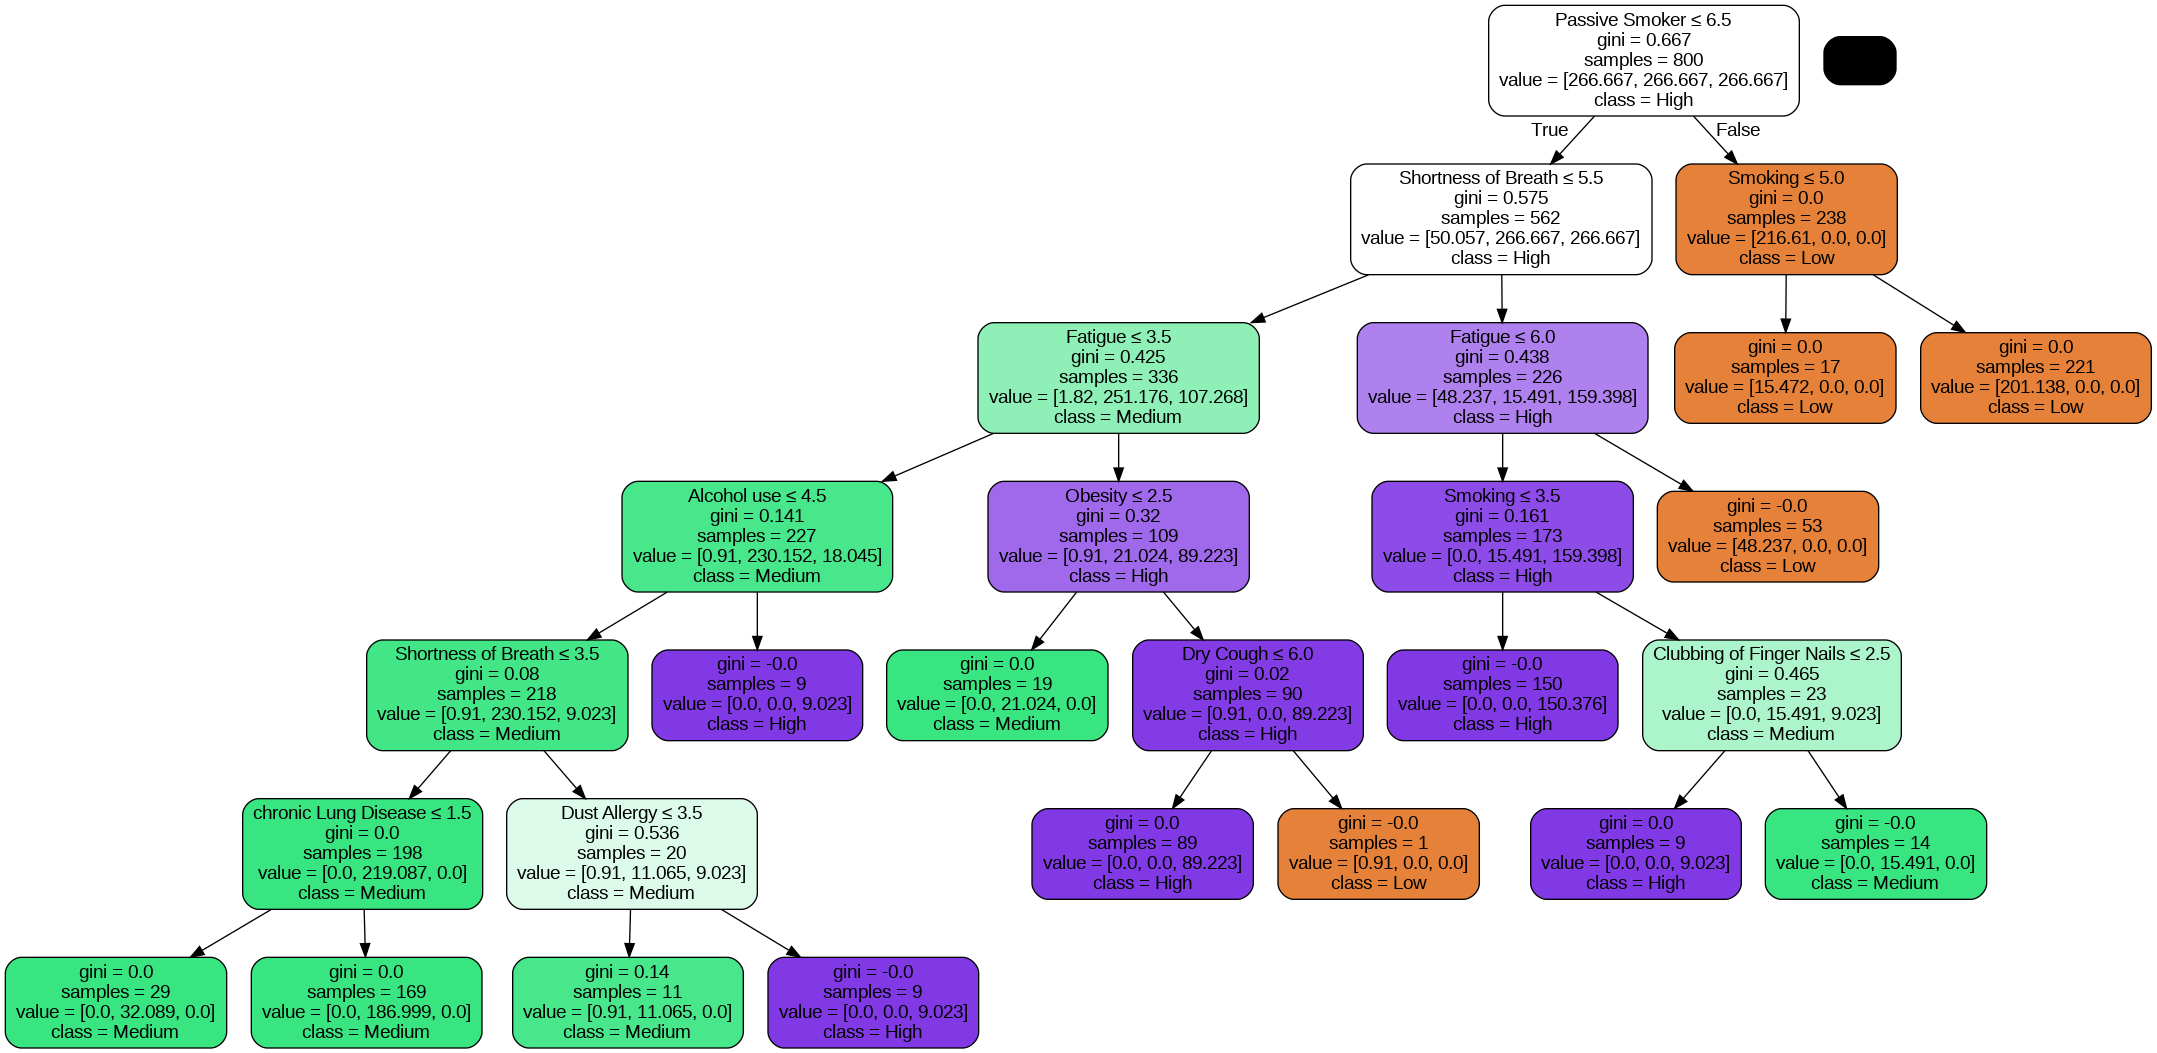

In [ ]:
dot_data = export_graphviz(modelo, out_file=None, feature_names=features, class_names=df[label].unique(), filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
modelo = gbc.fit(xtrain, ytrain, sample_weight=sample_weights)
prediccion = modelo.predict(xtest)
dump(modelo,'modelo6.joblib')

['modelo5.joblib']

High      367
Medium    332
Low       301
Name: Level, dtype: int64

score:  0.995
recall_score:  0.995
accuracy_score:  0.995
f1_score:  0.995
classification_report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        73
           1       1.00      0.98      0.99        61
           2       1.00      1.00      1.00        66

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



<Axes: >

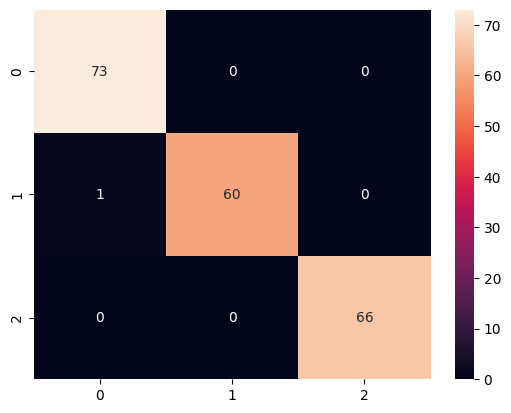

In [ ]:
print(df[label].value_counts())
print()
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ',recall_score(prediccion,ytest, average='micro'))
print('accuracy_score: ',accuracy_score(prediccion,ytest))
print('f1_score: ',f1_score(prediccion,ytest, average='micro'))
print('classification_report: ',classification_report(prediccion,ytest), sep='\n')
# si esta desbalancead recall
cf = confusion_matrix(prediccion,ytest)
sns.heatmap(cf, annot=True)

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

modelo = GaussianNB()
modelo.fit(xtrain, ytrain, sample_weight=sample_weights)
prediccion = modelo.predict(xtest)

High      367
Medium    332
Low       301
Name: Level, dtype: int64

score:  0.845
recall_score:  0.845
accuracy_score:  0.845
f1_score:  0.845
classification_report: 
              precision    recall  f1-score   support

           0       0.95      0.85      0.90        82
           1       0.90      0.79      0.84        68
           2       0.68      0.90      0.78        50

    accuracy                           0.84       200
   macro avg       0.84      0.85      0.84       200
weighted avg       0.86      0.84      0.85       200



<Axes: >

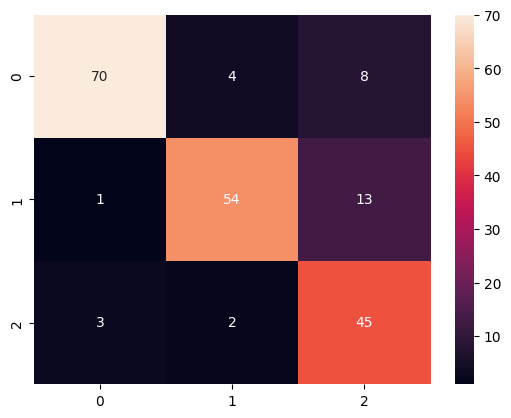

In [ ]:
print(df[label].value_counts())
print()
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ',recall_score(prediccion,ytest, average='micro'))
print('accuracy_score: ',accuracy_score(prediccion,ytest))
print('f1_score: ',f1_score(prediccion,ytest, average='micro'))
print('classification_report: ',classification_report(prediccion,ytest), sep='\n')
# si esta desbalancead recall
cf = confusion_matrix(prediccion,ytest)
sns.heatmap(cf, annot=True)

# Resultados

|    recall    |   SVC     | randomForest | DecisionTree |GradientBoosting|naive bayes|
|--------------|-----------|--------------|--------------|----------------|-----------|
|       0      |   1.00    |     1.00     |    1.00      |     1.00       |   0.85         |   
|       1      |   0.98    |     0.98     |    0.98      |     0.98       |   0.79         |
|       2      |   1.00    |     1.00     |    1.00      |     1.00       |   0.90         |
|   accuracy   |   0.99    |     0.99     |    0.99      |     0.99       |   0.84         |


Todos los modelos de clasificacion dieron 0.99 de score excepto el de Naive Bayes, y como la mayoria son iguales estaba dificil elegir cual, pero elegi Gradient Boosting porque fue uno de los ultimos en ser creados con su tecnologia de ensemble